
### CPP 6102: Computational Thinking & Programming 4 Data Science - CAT 2 
#### NIcholas Barasa 024/06024

#### Note: This task should be supported practically, and your work must be meaningful and logically sound.

#### Use a dataset of your choice, to show the following. In each case, Support your answer with a valid explanation of the rationale of the activity.

### i. Highlight or explain what your data is about

Dataset - Covid19 dataset, publicly available via [link](https://www.kaggle.com/datasets/imdevskp/corona-virus-report/data)

The dataset contains 49068 records about COVID-19 cases worldwide, segmented by:
- **Province/State**: Sub-regions or states in a country.
- **Country/Region**: The country where the data was recorded.
- **Lat/Long**: Geographical coordinates (latitude and longitude) of the respective regions.
- **Date**: The date when the cases were reported.
- **Confirmed, Deaths, Recovered, Active**: Numerical data capturing the number of confirmed cases, deaths, recoveries, and active cases on the given date.
- **WHO Region**: Categorization of countries by WHO-defined regions.

This data is useful for tracking the spread and impact of COVID-19 across regions and dates.

---

### ii. Three data preparation activities

1. **Handling Missing Values**
2. **Data Type Conversion**
3. **Data Filtering**

---

### iii. Two Data Analysis Activities

1. **Trend Analysis**: Analyze the progression of COVID-19 cases over time for a specific region or country.
2. **Regional Comparison**: Compare COVID-19 statistics (e.g., Deaths to Confirmed ratio) across WHO regions.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
covid_data = pd.read_csv('archive/covid_19_clean_complete.csv')

# Display first few rows
covid_data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [3]:

# Check for missing values
missing_values = covid_data.isnull().sum()
missing_values


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [4]:

# Convert 'Date' column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data.dtypes


Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [5]:

# Filter rows where Confirmed cases are greater than 0
filtered_data = covid_data[covid_data['Confirmed'] > 0]
filtered_data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
53,Guangdong,China,23.3417,113.4244,2020-01-22,26,0,0,26,Western Pacific


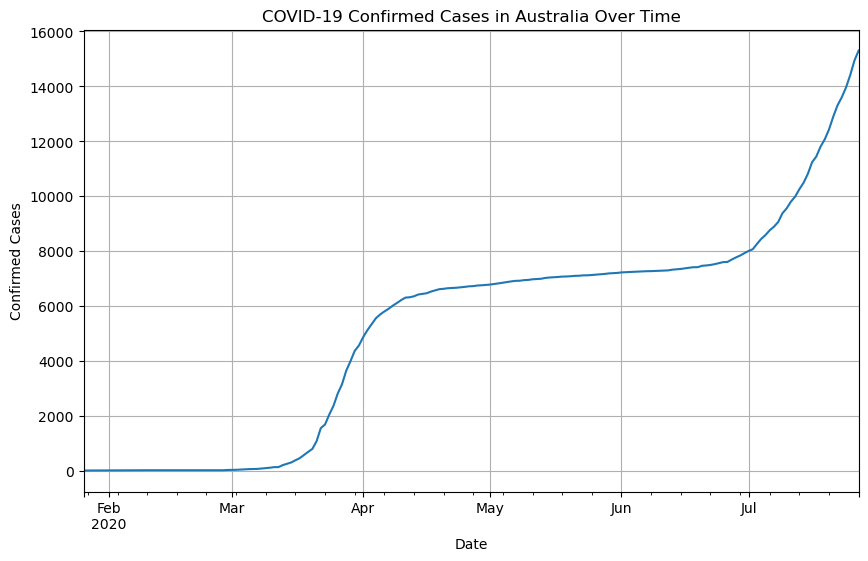

In [6]:

# Trend analysis: Confirmed cases in Australia over time
australia_data = filtered_data[filtered_data['Country/Region'] == 'Australia']
australia_trend = australia_data.groupby('Date')['Confirmed'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
australia_trend.plot()
plt.title('COVID-19 Confirmed Cases in Australia Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid()
plt.show()


C:\Users\B\AppData\Local\Temp\ipykernel_11848\136671595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Death Rate'] = filtered_data['Deaths'] / filtered_data['Confirmed']


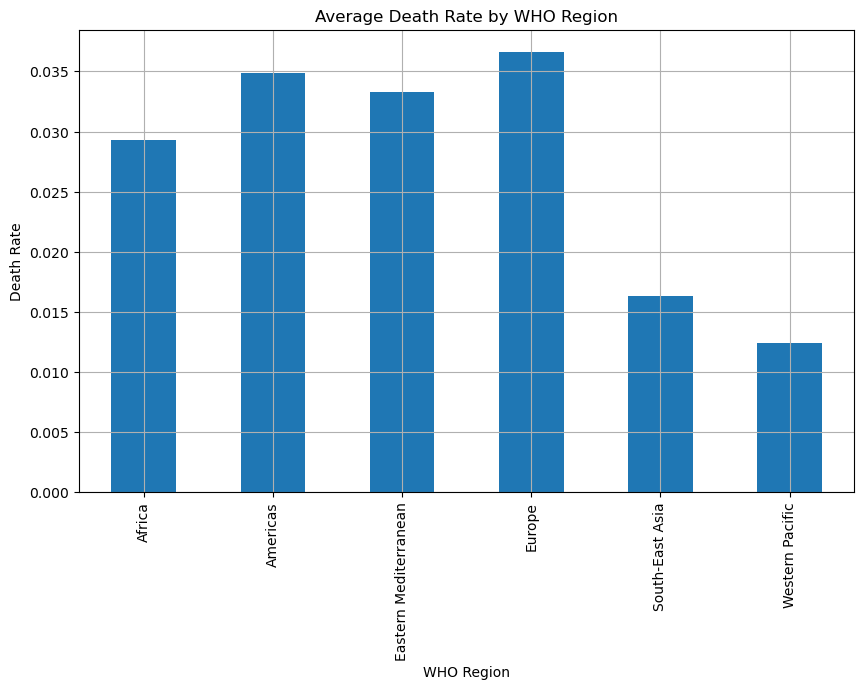

In [7]:

# Calculate death rate (Deaths / Confirmed) for each WHO Region
filtered_data['Death Rate'] = filtered_data['Deaths'] / filtered_data['Confirmed']
region_death_rate = filtered_data.groupby('WHO Region')['Death Rate'].mean()

# Plot regional death rate
region_death_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Average Death Rate by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Death Rate')
plt.grid()
plt.show()
